# Pengenalan Python untuk Data Mining

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/NLP UBG

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/NLP UBG'
/content


In [3]:
%ls

drive/  sample_data/


# Natural Language Processing (NLP) with Python

***

Pemrosesan bahasa alami adalah subbidang linguistik, ilmu komputer, dan kecerdasan buatan yang berkaitan dengan interaksi antara komputer dan bahasa manusia, khususnya cara memprogram komputer untuk memproses dan menganalisis data bahasa alami dalam jumlah besar.


# Agenda

> 1. Merepresentasikan teks sebagai data numerik
> 2. Membaca kumpulan data berbasis teks
> 3. Exploratory Data Analysis (EDA)
> 4. Pra-pemrosesan
> 5. Membuat vektorisasi dataset
> 6. Membangun dan mengevaluasi model
> 7. Membandingkan model

---

# Notebook Goals
> Dalam notebook ini kita akan membahas ikhtisar dasar-dasar Pemrosesan Bahasa Alami, yang pada dasarnya terdiri dari menggabungkan teknik pembelajaran mesin dengan teks, dan menggunakan matematika dan statistik untuk mendapatkan teks tersebut dalam format yang dapat dipahami oleh algoritma pembelajaran mesin!

In [4]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Representing text as numerical data

In [5]:
# contoh teks (pesan SMS)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

📌 From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [6]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)
# examine the fitted vocabulary
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [7]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)

In [8]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [9]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


📌 From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

📌 From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [10]:
# example text for model testing
simple_test = ["please don't call me"]

> In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [11]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [12]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())


,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


Out of Vocabulary (OOV)

*   Tidak ada kata don't




## 📋 **Summary:**

> - `vect.fit(train)` **learns the vocabulary** of the training data
> - `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
> - `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data (and **ignores tokens** it hasn't seen before)

# 2. Reading a text-based dataset into pandas
https://pandas.pydata.org/docs/reference/io.html

In [13]:
# read file into pandas using a relative path
path = "/content/drive/My Drive/Colab Notebooks/Praktikum Pemrograman 5"
sms = pd.read_csv(path + "/spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Exploratory Data Analysis (EDA)

In [14]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

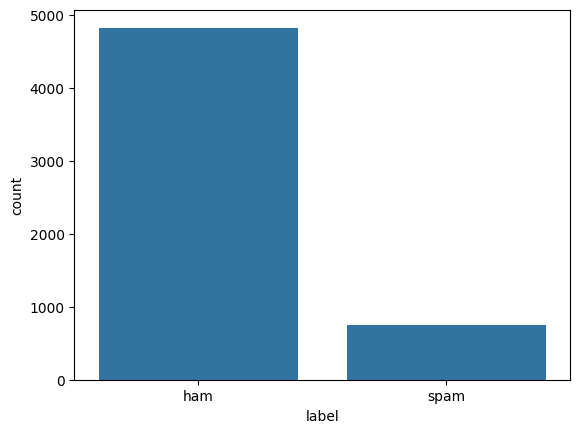

In [16]:
sns.countplot(data=sms, x='label')
plt.show()

We have `4825` ham message and `747` spam message

In [17]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


> As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of feature engineering. The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general.

In [18]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

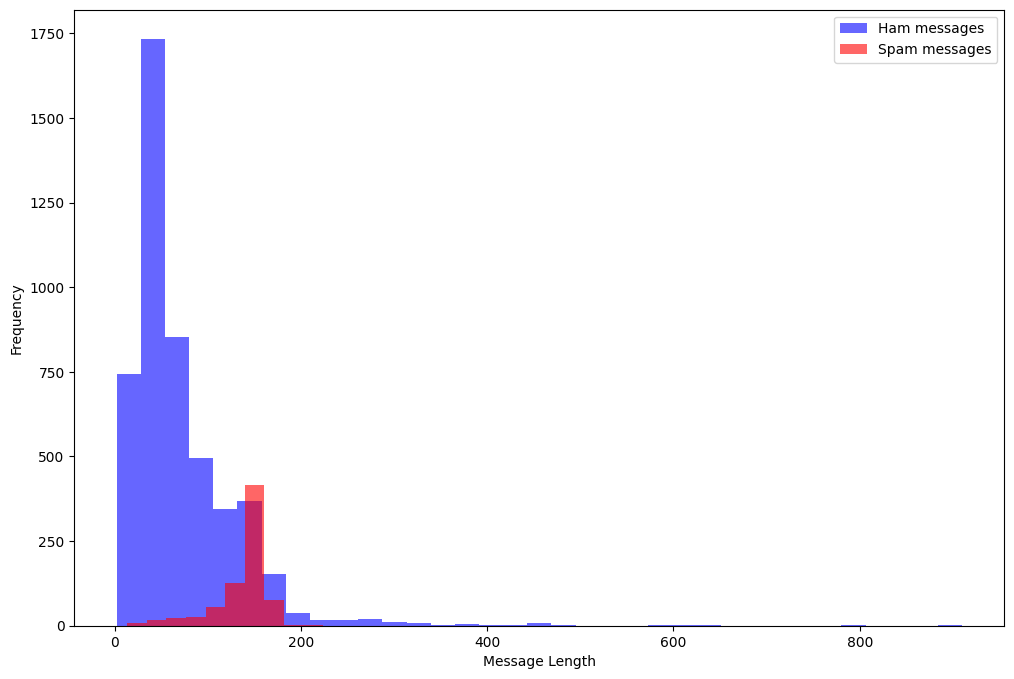

In [19]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

> Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters.

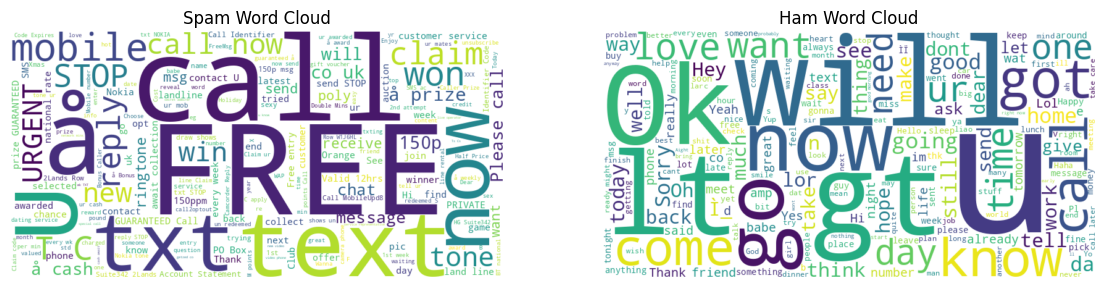

In [20]:
from wordcloud import WordCloud
# Separate spam and ham messages
spam_messages = ' '.join(sms[sms['label'] == 'spam']['message'])
ham_messages = ' '.join(sms[sms['label'] == 'ham']['message'])

# Generate word clouds for spam and ham messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

# 4. 📑 Text Pre-processing

> Our main issue with our data is that it is all in text format (strings). The classification algorithms that we usally use need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the `bag-of-words` approach, where each unique word in a text will be represented by one number.


> In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

> As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the `NLTK` library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

> Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

>First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [21]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [22]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


> Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [23]:
# !pip install --user -U nltk

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
sms['clean_msg'] = sms.message.apply(text_process)
# Tambahkan kolom msg_len ke dataframe sms
sms['msg_len'] = sms['clean_msg'].apply(len)
# Tampilkan lima baris pertama dari dataframe sms
sms.head()

,label,message,label_num,message_len,clean_msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...,82
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...,133
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say,31
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though,38


In [26]:
type(stopwords.words('english'))

list

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# 5. Vectorization

> Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

> Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

> We'll do that in three steps using the bag-of-words model:

> 1. Count how many times does a word occur in each message (Known as term frequency)
> 2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
> 3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

> Let's begin the first step:

> Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

> We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

> For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th>
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


> Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [28]:
#TFIDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Kalimat
kalimat = ["love you", "love me"]

# Inisialisasi TF-IDF Vectorizer dengan custom vocabulary
tfidf = TfidfVectorizer(vocabulary=['love', 'me', 'you'])

# Fit dan transformasi menggunakan TF-IDF Vectorizer
vektor_tfidf = tfidf.fit_transform(kalimat)

# Mendapatkan kata-kata
kata = tfidf.get_feature_names_out()

# Membuat DataFrame untuk hasil vektorisasi
df_tfidf = pd.DataFrame(vektor_tfidf.toarray(), columns=kata)

# Menampilkan hasil vektorisasi
print(df_tfidf)

       love        me       you
0  0.579739  0.000000  0.814802
1  0.579739  0.814802  0.000000


In [29]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print('text : ', X.shape)
print('label: ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1) #test_size=0.1

print("Data latih text: ", X_train.shape)
print("Data latih label: ", y_train.shape)
print("Data uji text: ", X_test.shape)
print("Data uji label: ", y_test.shape)

text :  (5572,)
label:  (5572,)
Data latih text:  (5014,)
Data latih label:  (5014,)
Data uji text:  (558,)
Data uji label:  (558,)


In [30]:
# Instansiasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit dan transform pada data latih
X_train_dtm = tfidf_vectorizer.fit_transform(X_train)
# Transform pada data uji
X_test_dtm = tfidf_vectorizer.transform(X_test)

print("Vektorisasi TF-IDF pada data latih selesai. Bentuk: ", X_train_dtm.shape)
print("Vektorisasi TF-IDF pada data uji selesai. Bentuk: ", X_test_dtm.shape)

Vektorisasi TF-IDF pada data latih selesai. Bentuk:  (5014, 8877)
Vektorisasi TF-IDF pada data uji selesai. Bentuk:  (558, 8877)


In [31]:
X_test_dtm

<558x8877 sparse matrix of type '<class 'numpy.float64'>'
	with 4178 stored elements in Compressed Sparse Row format>

# 6. Building and evaluating a model

> We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [32]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [33]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 5.28 ms, sys: 30 µs, total: 5.31 ms
Wall time: 24.1 ms


MultinomialNB()

Accuracy =  0.9713261648745519


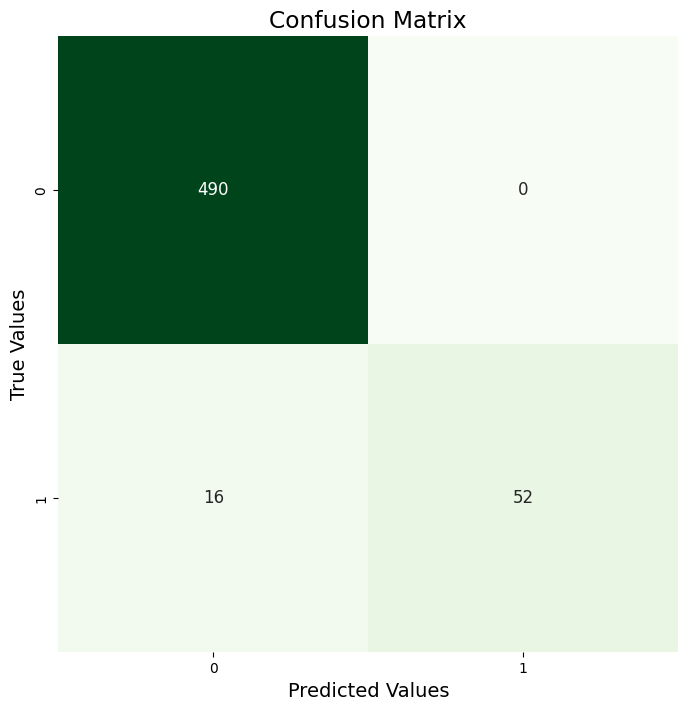

In [34]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print(50*"=")
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred_class))
print(50*"=")


# print the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Greens', fmt = '').set(title='Confusion Matrix');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()


In [35]:
# Prediksi untuk data baru
new_text = ["For Free Viagra, claim now !!!"]
X_new_dtm = tfidf_vectorizer.transform(new_text)  # Transform data teks baru menggunakan vektorizer yang sudah di-fit

# Melakukan prediksi kelas untuk data baru
new_predictions = nb.predict(X_new_dtm)

# Menampilkan hasil prediksi
for text, prediction in zip(new_text, new_predictions):
    print(f"Text: {text} => Predicted Class: {prediction}")

Text: For Free Viagra, claim now !!! => Predicted Class: 1


# 7. 📊 Comparing models

We will compare multinomial Naive Bayes with [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [36]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')  # Anda dapat mengubah kernel sesuai kebutuhan

# Latih model SVM menggunakan data latih
%time svm_model.fit(X_train_dtm, y_train)

CPU times: user 1.03 s, sys: 60 ms, total: 1.09 s
Wall time: 2.82 s


SVC(kernel='linear')

Accuracy (SVM) =  0.992831541218638


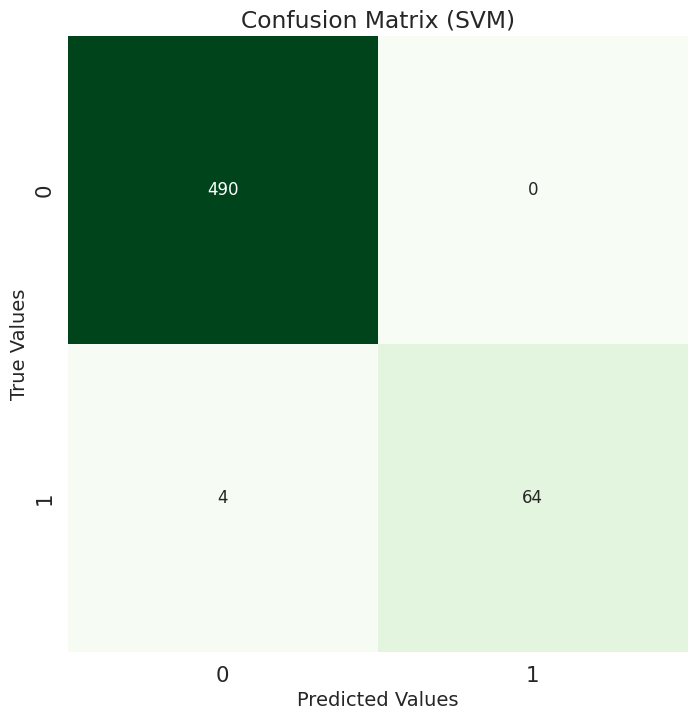

In [37]:
# Lakukan prediksi pada data uji
y_pred_class_svm = svm_model.predict(X_test_dtm)

# Hitung akurasi model SVM
print(50*"=")
print("Accuracy (SVM) = ", metrics.accuracy_score(y_test, y_pred_class_svm))
print(50*"=")

# Cetak confusion matrix untuk model SVM
cm_svm = confusion_matrix(y_test, y_pred_class_svm)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm, annot=True, annot_kws={"size": 12},
            cbar=False, cmap='Greens', fmt='').set(title='Confusion Matrix (SVM)');
ax1.set_ylabel('True Values', fontsize=14)
ax1.set_xlabel('Predicted Values', fontsize=14)
plt.show()

In [38]:
# Prediksi untuk data baru
new_text = ["For Free Viagra, claim now !!!"]
X_new_dtm = tfidf_vectorizer.transform(new_text)  # Transform data teks baru menggunakan vektorizer yang sudah di-fit

# Melakukan prediksi kelas untuk data baru
new_predictions = svm_model.predict(X_new_dtm)

# Menampilkan hasil prediksi
for text, prediction in zip(new_text, new_predictions):
    print(f"Text: {text} => Predicted Class: {prediction}")

Text: For Free Viagra, claim now !!! => Predicted Class: 1


# TUGAS INDIVIDU

Lengkapi Data Mahasiswa berikut!

*   NIM    :
*   NAMA   :



Lakukan semua tahapan kemudian ganti dataset dengan opensource dataset menggunakan model KNN, Decision Tree, dan Random Forest

Kumpulkan kembali notebook melalui Gform yang disediakan ketua kelas dengan nama file Nim_Nama.ipynb

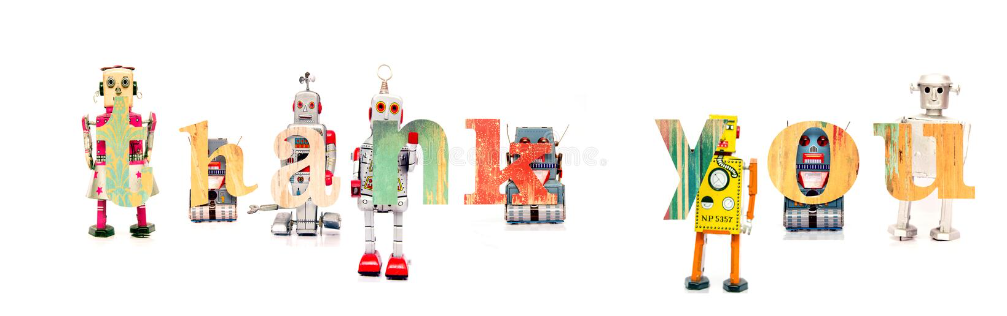